In [89]:
try:
  if os.path.exists(os.path.join(os.getcwd(),"Helper.py")):
    print("helper.py exists already, hence skipping downloading..")
  else:
    !wget https://raw.githubusercontent.com/iamatul1214/Tensorflow_Certification_Preparation/main/Helper.py
    print("Downloaded helper.py successfully")
except Exception as e:
  print(e)

helper.py exists already, hence skipping downloading..


In [90]:
from Helper import create_tensorboard_callback

## Let's get some data

### This time we will see how we can use the pretrained models frmo `tf.keras.applications` and apply them to our own problems.

In [91]:
## Getting 10% data of of 10 classes of food
from Helper import unzip_data
try:
  if os.path.exists(os.path.join(os.getcwd(),"10_food_classes_10_percent.zip")):
    print(f"data set is already unzipped and present")
  else:
    print("Downloading the data and unzipping it...")
    !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
    ### unzipping data
    print("Unzipping the data")
    unzip_data("10_food_classes_10_percent.zip")


    
except Exception as e:
  print("data not found in the directory... Hence downloading.....")
  

## creating train and test directories
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

## Let's walkthrough the data
from Helper import walk_through_dir
walk_through_dir("10_food_classes_10_percent")

## This time we will not use the ImageDataGenerator, we will use even a smarter version of that.
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size = BATCH_SIZE)


train_data_10_percent

train_data_10_percent.class_names

## see an example of batches of our data
for images, labels in train_data_10_percent.take(1):  ## 32 is the batch size by default hence the take will take 1 batch
  print(f"Images = {images} and labels = {labels}")
  print(len(labels))

data set is already unzipped and present
There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 imag

## Model 0: Using transfer learning to build a keras functional API
### The Sequential API runs our layers in the model in sequential manner but functional API is more flexible and can take multiple inputs and outputs.

In [92]:
## Create base model with tf.keras.applications 
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

## Freeze the base model so that the underlying pretrained models are not retrained again
base_model.trainable = False

## create inputs to our model
inputs = tf.keras.layers.Input(shape = (224,224,3), name = "Input layer")

## If we are using a model like Resnet50V2 we will need to normalize inputs, but not for effiecientNet.
# x = tf.keras.experimental.preprocessing.Rescaling(1./255)(inputs).  ## this means passing the inputs as parameter

x = base_model(inputs)

print(f"The shape of the base model after passing the inputs is {x.shape}")

## Average pool the output of the base_model input layer

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pool_2d") (x)
print(f"The shape of the model after globalaveragepool is {x.shape}")

## create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

## combine the input and output layers
model_0 = tf.keras.Model(inputs,outputs)

## Let's check the summary of the model
print(f"moDEL SUMMARY = {model_0.summary()}")

## compiling the model
model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

## Let's check the summary of the model
print(f"moDEL SUMMARY = {model_0.summary()}")

## fitting the model
from Helper import create_tensorboard_callback
history_0 = model_0.fit(train_data_10_percent,epochs = 3,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,
                        validation_steps = int(0.25 * len(test_data)),callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                                               experiment_name = "feature_extraction-10_percent")])


## validation_steps = int(0.25 * len(test_data)) will reduce the validation steps to 1/4 and hence reduce training time

The shape of the base model after passing the inputs is (None, 7, 7, 1280)
The shape of the model after globalaveragepool is (None, 1280)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pool_2d (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
______________________________________

In [93]:
## Now let's evaluate on full test dataset
model_0.evaluate(test_data)

79/79 [==============================] - 31s 388ms/step - loss: 0.7147 - accuracy: 0.8496


[0.7146952748298645, 0.8496000170707703]

In [94]:
model_0.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pool_2d (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [95]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_14 (Rescaling)       (None, None, None,   0           ['input_9[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_8 (Normalization  (None, None, None,   7          ['rescaling_14[0][0]']           
 )                              3)                                                   

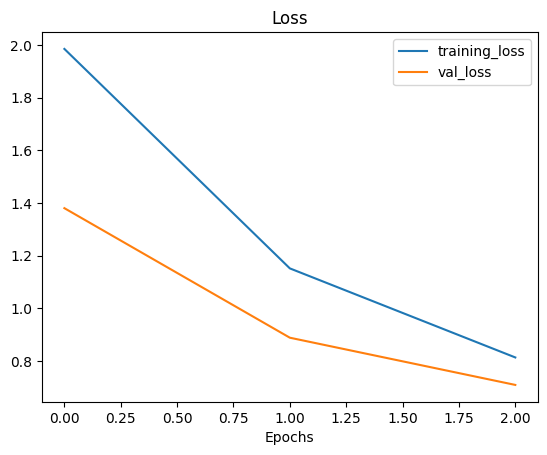

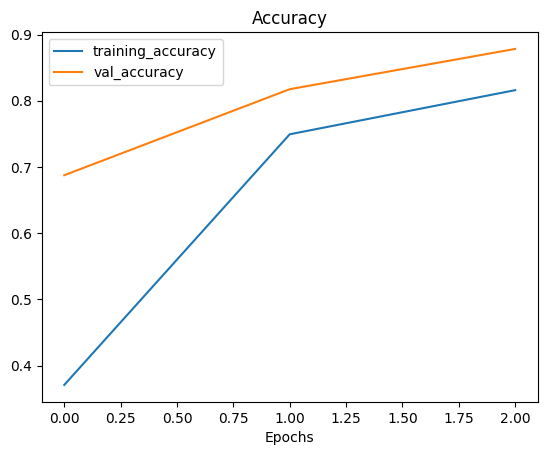

In [96]:
## lET'S CHECK OUR TRAINING CURVES
from Helper import plot_loss_curves
plot_loss_curves(history_0)

## Running a series of transfer learning experments-:

We have seen the transfer learning working incredibly with out 10% percent data. Now let's see how the model performs with the 1% of the dataset.

1. `Model_1` : Use feature extraction transfer learning with 1% of the training dataset with data augmentation.
2. `Model_2` :  Use feature extraction transfer learning with 10% of the training dataset with data augmentation.
3. `Model_3` : Use fine tuning transfer learning with 10% of the training data with data augmentation.
4. `Model_4` : Use fine tuning transfer learning with 10% of the training data with data augmentation.


We will use same datset in all the model experiments.

## getting and preprocessing the data for model 1

In [4]:
## Let's get the 1 percent data
from Helper import unzip_data
try:
    if os.path.exists(os.path.join(os.getcwd(),"10_food_classes_1_percent.zip")):
        print(f"data set is already unzipped and present")
    else:
        print("Downloading the data and unzipping it...")
        !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
        ### unzipping data
        print("Unzipping the data")
        unzip_data("10_food_classes_1_percent.zip")



except Exception as e:
    print("data not found in the directory... Hence downloading.....")

data set is already unzipped and present


In [15]:
## creating training and testing directories
train_dir_1_percent = "10_food_classes_1_percent/train" 
test_dir = "10_food_classes_1_percent/test"

In [16]:
## walkthrough the directory
from Helper import walk_through_dir
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'

In [17]:
## Setting up the dataloaders

import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                                 label_mode = "categorical",
                                                                                 image_size = IMG_SIZE,
                                                                                 batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                      label_mode = "categorical",
                                                                      image_size = IMG_SIZE,
                                                                      batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [29]:
import tensorflow as tf
## Let's create a data augmentation stage with horizontal flipping, rotation and zoom etc

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2)
    
], name = "data_augmentation_layer")

## The advantage of augmenting data on the stage level rather than image_data_generator level is that stage will 
## be considered in model training and hence it will use gpu but image_data_generator will use cpu ONLY.

Original random image from --->10_food_classes_1_percent/train/fried_rice/230621.jpg


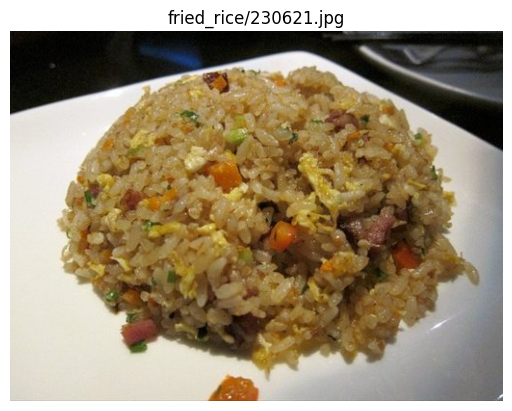

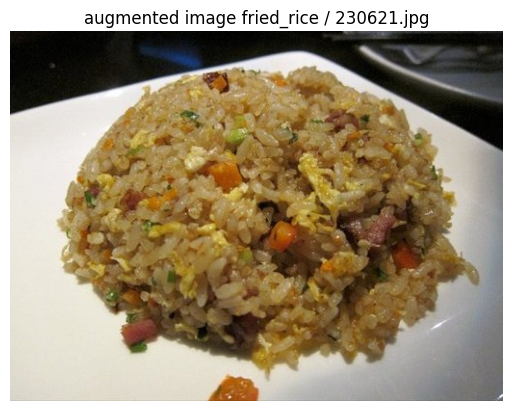

In [33]:
## View a random image and compare it with its augmented form
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir +"/"+ random_image
# plt.imshow(random_image_path)
img = mpimg.imread(random_image_path)
print(f"Original random image from --->{random_image_path}")
plt.title(target_class + "/" + random_image)
plt.axis(False)
plt.imshow(img)

## Let's see our augmented image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.title(f"augmented image {target_class} / {random_image}")
plt.axis("off")
plt.imshow(tf.squeeze(augmented_img))

In [22]:
from Helper import create_tensorboard_callback

## Setup input shape and freezing the layers of base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

## create the input layer
inputs = tf.keras.layers.Input(shape = input_shape, name ="input_layer")


##Add in data augmentaiton seuential model as a layer
x = data_augmentation(inputs)

## Give base model the inputs after getting augmented and don't train it.
x = base_model(x, training = False)

## Pool output features of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_avg_pooling_layer")(x)

## Put a dense layer on as the output
outputs = tf.keras.layers.Dense(10, activation = "softmax", name="output_layer")(x)

## Make a model using the inputs and outputs

model_1 = tf.keras.Model(inputs, outputs)

## compile the model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

## Fit the model
history_1_percent = model_1.fit(train_data_1_percent, epochs = 5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25*len(test_data)),
                                callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                         experiment_name ="1_percent_data_augmented")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmented/20221013-094848
Epoch 1/5
3/3 [==============================] - 14s 5s/step - loss: 2.3533 - accuracy: 0.0857 - val_loss: 2.3104 - val_accuracy: 0.0806
Epoch 2/5
3/3 [==============================] - 8s 4s/step - loss: 2.3238 - accuracy: 0.1000 - val_loss: 2.3139 - val_accuracy: 0.0905
Epoch 3/5
3/3 [==============================] - 8s 4s/step - loss: 2.3341 - accuracy: 0.1000 - val_loss: 2.3169 - val_accuracy: 0.0954
Epoch 4/5
3/3 [==============================] - 8s 4s/step - loss: 2.3463 - accuracy: 0.1000 - val_loss: 2.3226 - val_accuracy: 0.0839
Epoch 5/5
3/3 [==============================] - 7s 4s/step - loss: 2.3375 - accuracy: 0.1000 - val_loss: 2.3183 - val_accuracy: 0.1069


In [23]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, None, None, 3)    0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [34]:
## Evaluate on full dataset
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 28s 348ms/step - loss: 2.3179 - accuracy: 0.1000


[2.317856550216675, 0.10000000149011612]

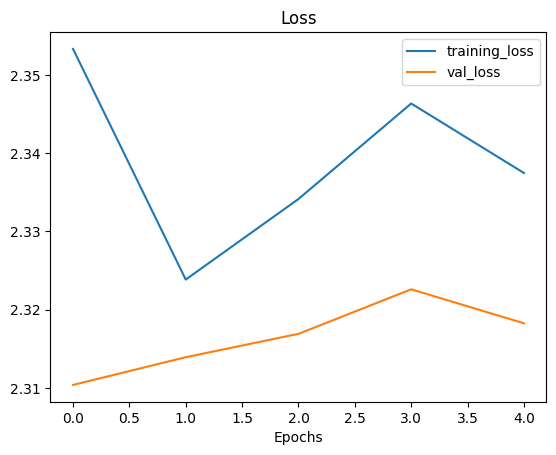

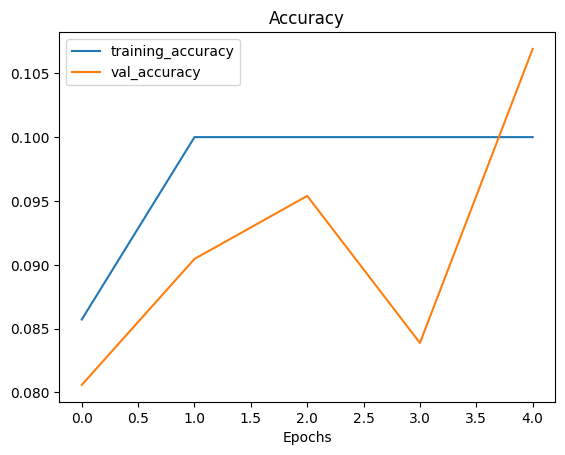

In [37]:
import pandas as pd
from Helper import plot_loss_curves
# pd.DataFrame(history_1_percent.history).plot()
plot_loss_curves(history_1_percent)

## Model 2: Feature extraction data model on 10 percent data on data augmentation

In [38]:
## Getting 10% data of of 10 classes of food
from Helper import unzip_data
try:
  if os.path.exists(os.path.join(os.getcwd(),"10_food_classes_10_percent.zip")):
    print(f"data set is already unzipped and present")
  else:
    print("Downloading the data and unzipping it...")
    !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
    ### unzipping data
    print("Unzipping the data")
    unzip_data("10_food_classes_10_percent.zip")


    
except Exception as e:
  print("data not found in the directory... Hence downloading.....")
  

data set is already unzipped and present


In [39]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [40]:
from Helper import walk_through_dir
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [42]:
## Set data inputs
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [44]:
import tensorflow as tf

In [54]:
## create model 2 wtih data augmentation built it

## Build data augmentation layer ( we can use previous one as well)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    # tf.keras.layers.experimental.preprocessing.Rescaling(1/255.), For efficientNet has rescaling built it, but use it for other models
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)],
    name = "data_augmentaiton_layer")

## Setup the input shape for our model
input_shape = (224,224,3)

## Create a frozen based model ( also called as backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

## Create the inputs and outputs including the layers in between
inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")
x = data_augmentation(inputs)  ## augmenting our training images
x = base_model(x, training =False) ## Pass augmented images to base model but keep it in inference mode only and don't train as we are utilizing the feature extraction only
x = tf.keras.layers.GlobalAveragePooling2D(name="Global_avg_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)
model_2 = tf.keras.Model(inputs,outputs)

## compile
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentaiton_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

## Creating a Model checkpoint callback
The modelCheckpoint callback intermediately saves our model during training. This is useful in starting the training from where we left off.

In [62]:
## Set checkpoint path
checkpoint_path = "10_percent_model_checkpoints_weights/checkpoint.ckpt"

## create a modelcheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch"
                                                     
                                               )

In [56]:
checkpoint_callback

In [68]:
## Let's fit the model
history_10_percent_data_aug = model_2.fit(train_data_10_percent, epochs=5, steps_per_epoch=len(train_data_10_percent),
                                        validation_data=test_data, validation_steps=int(0.25 * len(test_data)), 
                                        callbacks= [create_tensorboard_callback(dir_name = "transfer_learning", 
                                                                                experiment_name="model_2_10_percent_transfer_learning"),
                                                    checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_2_10_percent_transfer_learning/20221013-111917
Epoch 1/5
24/24 [==============================] - 18s 738ms/step - loss: 0.3795 - accuracy: 0.9147 - val_loss: 0.4505 - val_accuracy: 0.8684
Epoch 2/5
24/24 [==============================] - 17s 713ms/step - loss: 0.3858 - accuracy: 0.9053 - val_loss: 0.4422 - val_accuracy: 0.8684
Epoch 3/5
24/24 [==============================] - 17s 718ms/step - loss: 0.3753 - accuracy: 0.9027 - val_loss: 0.4156 - val_accuracy: 0.8799
Epoch 4/5
24/24 [==============================] - 16s 691ms/step - loss: 0.3375 - accuracy: 0.9227 - val_loss: 0.4272 - val_accuracy: 0.8734
Epoch 5/5
24/24 [==============================] - 17s 702ms/step - loss: 0.3347 - accuracy: 0.9280 - val_loss: 0.4202 - val_accuracy: 0.8799


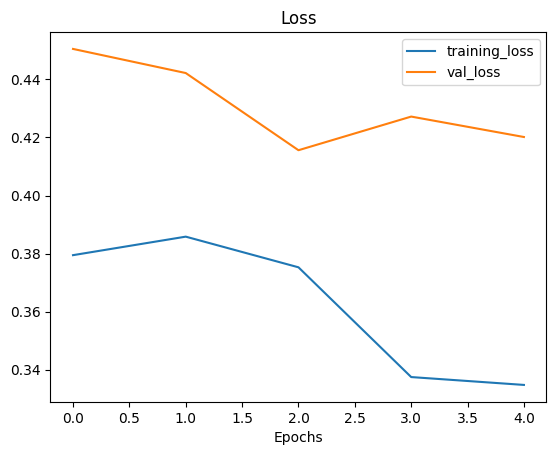

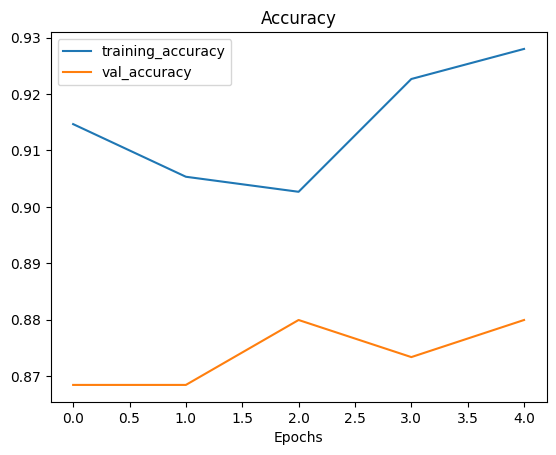

In [69]:
plot_loss_curves(history_10_percent_data_aug)

In [71]:
ten_Percent_data_aug_results = model_2.evaluate(test_data)

79/79 [==============================] - 31s 386ms/step - loss: 0.4336 - accuracy: 0.8688


## Loading in checkpoined weights
It returns to model in specific checkpoint

In [80]:
## Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [81]:
## Now all the weights stored in model_2 will override by checkpoint weights
loaded_wt_model_2_results = model_2.evaluate(test_data)

79/79 [==============================] - 30s 382ms/step - loss: 0.4397 - accuracy: 0.8692


## The model weight loaded result and non loaded trained model results are almost same, the difference is very minimal because of computers store long numbers with different precision

In [85]:
ten_Percent_data_aug_results == loaded_wt_model_2_results

False

In [86]:
ten_Percent_data_aug_results,loaded_wt_model_2_results

([0.43364062905311584, 0.8687999844551086],
 [0.43966811895370483, 0.8691999912261963])

## To check if the loaded model results are close or not we can numpy library

In [87]:
import numpy as np
np.isclose(np.array(ten_Percent_data_aug_results), np.array(loaded_wt_model_2_results))

array([False, False])

In [88]:
## let's print the difference between these numbers 
print(np.array(ten_Percent_data_aug_results) - np.array(loaded_wt_model_2_results))

[-0.00602749 -0.00040001]
